# Clase 1. Autoencoders

## repaso Modelo 9 (neuronas) ✅

### basics

In [ ]:
import pandas as pd
df = pd.read_csv("/content/creditcard.csv")
df.head(2)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]

In [ ]:
del df["Time"]

In [ ]:
df.head(2)

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 30 columns]

In [ ]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### train-test

In [ ]:
y = df["Class"]
X =df.drop("Class", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)

### neuronas

In [ ]:
from keras import Sequential
from keras.layers import Dense, Activation

model1 = Sequential()

# Capa de entrada
model1.add(Dense(50, input_dim=X.shape[1], activation="relu"))

# Capas ocultas
model1.add(Dense(200, activation="relu"))
model1.add(Dense(75, activation="relu"))
model1.add(Dense(50, activation="relu"))

# Capa de salida (binaria → sigmoid)
model1.add(Dense(1, activation="sigmoid"))


model1.compile(loss="binary_crossentropy", metrics=["accuracy"])

history = model1.fit(X,y, validation_split=0.3, shuffle=True, epochs=10)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9974 - loss: 0.0953 - val_accuracy: 0.9994 - val_loss: 0.0144
Epoch 2/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9977 - loss: 0.0318 - val_accuracy: 0.9994 - val_loss: 0.0177
Epoch 3/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.9980 - loss: 0.0319 - val_accuracy: 0.9995 - val_loss: 0.0142
Epoch 4/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.9983 - loss: 0.0286 - val_accuracy: 0.9992 - val_loss: 0.0075
Epoch 5/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9978 - loss: 0.0262 - val_accuracy: 0.9995 - val_loss: 0.0202
Epoch 6/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9986 - loss: 0.0219 - val_accuracy: 0.9994 - val_loss: 0.0111
Epoch 7/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9980 - loss: 0.0308 - val_accuracy: 0.9991 - val_loss: 0.0259
Epoch 8/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9985 - loss: 0.0331 - val

In [ ]:
model1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 50)             │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 200)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 75)             │        15,075 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,254 (239.28 KB)

 Trainable params: 30,626 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,628 (119.64 KB)

In [ ]:
y_pred =(model1.predict(X)>0.5).astype(int)

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


In [ ]:
#si queremos reducir dibujos usamos MaxPooling2D, Conv2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu')) # Conv2D(...) → detector de patrones, Aplica filtros 3×3 sobre la imagen
model.add(MaxPooling2D(pool_size=(2, 2))) #MaxPooling2D → reduce tamaño
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #Flatten Convierte la imagen 2D/3D en un vector 1D
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='sparse categorical crossentropy, metrics=/'accuracy l)

## Autoencoders ✅

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()

model.add(Dense(30, input_dim=30, activation="relu"))

model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu")) #--provocamos perdida de datos y luego hagamos q los recupere -- asi q comparamos los datos q entran y los q salen, si son iguales/parecidos esta bien, pero si no: es raro va a ser una anomalia (en nuestro caso seria fraude, ya q es un dato anomalo, pasa pocas veces)
model.add(Dense(10, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(30, activation="relu"))

model.compile(loss="mse", metrics=["mae"])

model.fit(df, df, epochs=20)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 139.1199 - mae: 0.8870
Epoch 2/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.9277 - mae: 0.5980
Epoch 3/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.8791 - mae: 0.5886
Epoch 4/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 2.5234 - mae: 0.5907
Epoch 5/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 2.1065 - mae: 0.5933
Epoch 6/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 2.4669 - mae: 0.5932
Epoch 7/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.8090 - mae: 0.5834
Epoch 8/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 1.7420 - mae: 0.5778
Epoch 9/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 1.7379 - mae: 0.5818
Epoch 10/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.8083 - mae: 0.5846
Epoch 11/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 2.2093 - mae: 0.5879
Epoch 12/20
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.8328 -

In [ ]:
credit_t = model.predict(df)
credit_t

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


array([[0.0000000e+00, 0.0000000e+00, 2.2737575e+00, ..., 0.0000000e+00,
        1.4924673e+02, 0.0000000e+00],
       [1.1446897e+00, 2.3735952e-01, 1.5078932e-02, ..., 0.0000000e+00,
        2.9620626e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.7844586e+02, 0.0000000e+00],
       ...,
       [1.9625893e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        6.7487206e+01, 0.0000000e+00],
       [0.0000000e+00, 2.3240113e-01, 1.2151999e+00, ..., 0.0000000e+00,
        1.0406395e+01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.1681584e+02, 0.0000000e+00]], dtype=float32)

In [ ]:
distancias =((df - credit_t)**2).sum(axis=1)

In [ ]:
distancias.mean()

np.float64(25.17082547048821)

## Mnist

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mnist = pd.read_csv("/content/mnist.csv")
mnist.head(2)

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  

[2 rows x 785 columns]

In [ ]:
y = mnist["label"]
del mnist["label"]

In [ ]:
mnist[0:1].values

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,  36

In [ ]:
mnistArray = mnist.to_numpy() #to_numpy() crea una array de NumPy es 👉 una estructura para guardar muchos datos del mismo tipo de forma ordenada y eficiente.

print(mnistArray.shape)
mnistArray

(60000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pixeles_fila_india = mnist.to_numpy().reshape(-1)

In [ ]:
import random

pixeles_ruido = []

for pixel in pixeles_fila_india:
    aleatorio = random.randint(0, 100) # andom.randint(0, 100) Devuelve un número entero aleatorio entre 0 y 100, incluidos ambos
    if aleatorio <= 10: #solo a un 10% de los píxeles se les aplicará “ruido”
        # Estamos borrando el píxel si es oscuro (<128)
        if pixel < 128: #Estás invirtiendo el píxel, pero solo cuando toca ruido. ---es oscuro (<128) → lo conviertes en blanco (255), y viceversa es claro (≥128) → lo conviertes en negro (0)
            pixeles_ruido.append(255) #blanco (255)
        else:
            pixeles_ruido.append(0) #negro (0)
    else:
        # Si no toca borrarlo, mantenemos el valor original
        pixeles_ruido.append(pixel)

In [ ]:
import numpy as np

imagenes_con_ruido = np.reshape(pixeles_ruido, (-1, 784))

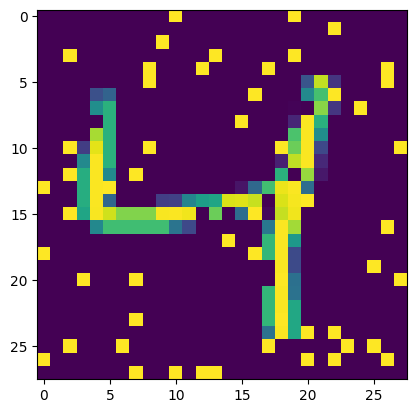

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(imagenes_con_ruido[2].reshape(28, 28))

In [ ]:
# 6️⃣ Definimos el autoencoder
model = Sequential()

model.add(Dense(400, input_dim=28*28, activation="relu"))

model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(400, activation="relu"))

model.add(Dense(28*28, activation="relu"))   # capa de salida

model.compile(loss='mean_squared_error', optimizer='Adam')


# 7️⃣ Entrenamos el autoencoder
#    ENTRADA: imágenes con ruido
#    SALIDA: imágenes originales (sin ruido)
history = model.fit(
    imagenes_con_ruido,
    mnistArray,
    epochs=10,
    validation_split=0.3,
    shuffle=True
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - loss: 3223.3501 - val_loss: 2068.9648
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - loss: 1984.8849 - val_loss: 1877.8113
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - loss: 1783.2468 - val_loss: 1743.2616
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - loss: 1660.9360 - val_loss: 1697.0012
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 1584.4288 - val_loss: 1651.1478
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - loss: 1556.0679 - val_loss: 1672.8276
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 1519.6261 - val_loss: 1664.9738
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 1486.1727 - val_loss: 1655.2424
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - loss: 1470.0511 - val_loss: 1615.8992
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 1447.1616 - val_loss: 1598.6036


In [ ]:
# 8️⃣ Reconstruimos imágenes SIN ruido con el modelo entrenado
imagenes_sin_ruido = model.predict(imagenes_con_ruido)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


In [ ]:
# 9️⃣ Visualizamos original + ruidosa + reconstruida para la misma imagen
n = 5
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

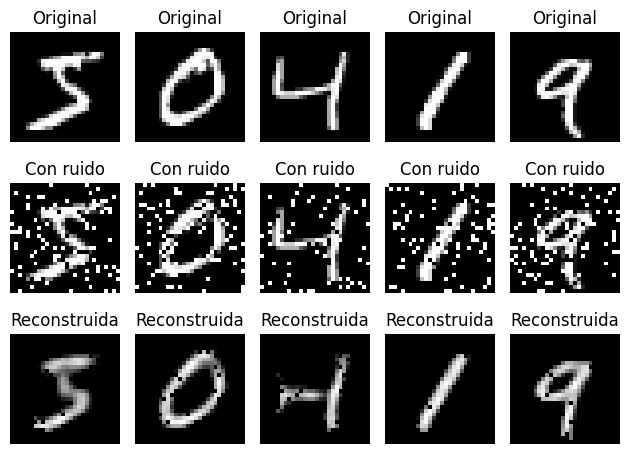

In [ ]:
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(mnistArray[i].reshape(28, 28), cmap="gray")
    ax.set_title("Original")
    ax.axis("off")

    # Con ruido
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(imagenes_con_ruido[i].reshape(28, 28), cmap="gray")
    ax.set_title("Con ruido")
    ax.axis("off")

    # Reconstruida
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(imagenes_sin_ruido[i].reshape(28, 28), cmap="gray")
    ax.set_title("Reconstruida")
    ax.axis("off")

plt.tight_layout()
plt.show()

### Power

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mnist = pd.read_csv("/content/mnist.csv")
y = mnist["label"]
del mnist["label"]

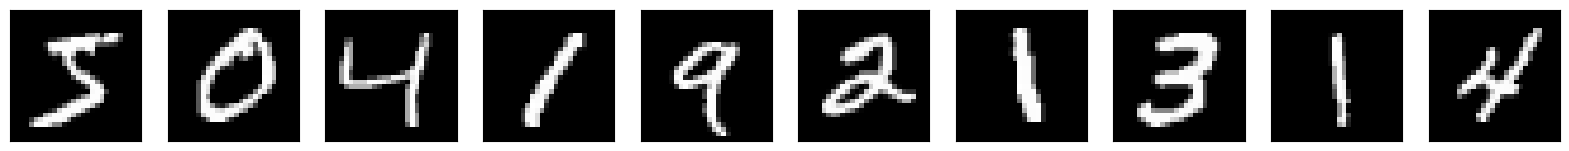

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(mnistArray[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#convertir mnist de un dataset  a  array
mnistArray = mnist.to_numpy()
print(mnistArray.shape)
mnistArray


(60000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import random
porcentaje_ruido = 10
elements = mnistArray.shape[0]
size_array = mnistArray.shape[1]
for i in range(elements):
  for j in range(784):
    if random.randint(0, 100) < porcentaje_ruido:
      mnistArray[i][j] = 255 if mnistArray[i][j] < 128 else 0

In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten

model = Sequential()

model.add(Dense(400, input_dim=28*28, activation ="relu"))

model.add(Dense(200, activation ="relu"))
model.add(Dense(100, activation ="relu"))
model.add(Dense(50, activation ="relu"))
model.add(Dense(100, activation ="relu"))
model.add(Dense(200, activation ="relu"))
model.add(Dense(400, activation ="relu"))

model.add(Dense(28*28, activation ="relu"))


model.compile(loss='mean_squared_error', optimizer='Adam')

model.fit(mnistArray, mnistArray, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - loss: 8045.0098 - val_loss: 7073.4985
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - loss: 7004.0088 - val_loss: 6863.2017
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 6832.2202 - val_loss: 6776.2280
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - loss: 6724.9497 - val_loss: 6685.7896
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 6636.8945 - val_loss: 6633.9448
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - loss: 6587.1904 - val_loss: 6621.9824
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 6568.7744 - val_loss: 6594.8540
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - loss: 6552.2612 - val_loss: 6571.9014
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 6515.9292 - val_loss: 6568.7642
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - loss: 6501.1294 - val_loss: 6555.3311


In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_73 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 784)            │       314,384 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,434 (3.20 MB)

 Trainable params: 839,434 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
imagenes_sin_ruido = model.predict(mnistArray)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


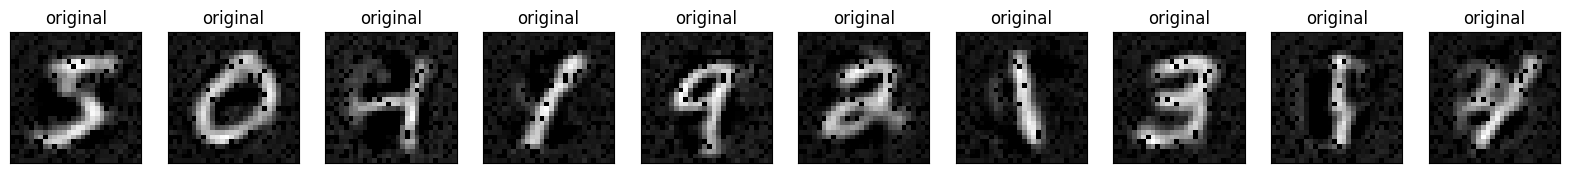

In [ ]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(imagenes_sin_ruido[i].reshape(28, 28))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Clase 2. Redes neuronales CONVOLUCIONALES

## Cifar10

In [ ]:
from keras.datasets import cifar10

cifar10

<module 'keras.datasets.cifar10' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/cifar10/__init__.py'>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

(x_train, y_train),(x_test,
y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
num_classes = 10 # Hay 10 categorías de imágenes
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(1000, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

resultado = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1655 - loss: 5.2747 - val_accuracy: 0.3490 - val_loss: 1.8089
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4233 - loss: 1.5914 - val_accuracy: 0.5220 - val_loss: 1.4068
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5701 - loss: 1.2245 - val_accuracy: 0.5895 - val_loss: 1.1970
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6577 - loss: 0.9904 - val_accuracy: 0.6027 - val_loss: 1.1838
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7192 - loss: 0.8124 - val_accuracy: 0.6172 - val_loss: 1.2175
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7833 - loss: 0.6320 - val_accuracy: 0.6230 - val_loss: 1.2827
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8453 - loss: 0.4543 - val_accuracy: 0.6077 - val_loss: 1.7181
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8782 - loss: 0.3548 -

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     2,305,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,334,402 (8.91 MB)

 Trainable params: 2,334,402 (8.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
predict = model.predict(x_test) # ¿Pruebas a ver si eres capaz de hacer una mejor red?

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Chihuahuas & muffins

In [ ]:
from tensorflow.keras.utils  import image_dataset_from_directory

train = image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/chihuahuas/train", image_size=(180, 180))
test = image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/chihuahuas/test", image_size=(180, 180))

Found 256 files belonging to 2 classes.
Found 363 files belonging to 2 classes.


In [ ]:
train.class_names # Muestras las distintas clases

['chihuahua', 'muffins']

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20)) #tamaňo generico pa todos plt

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

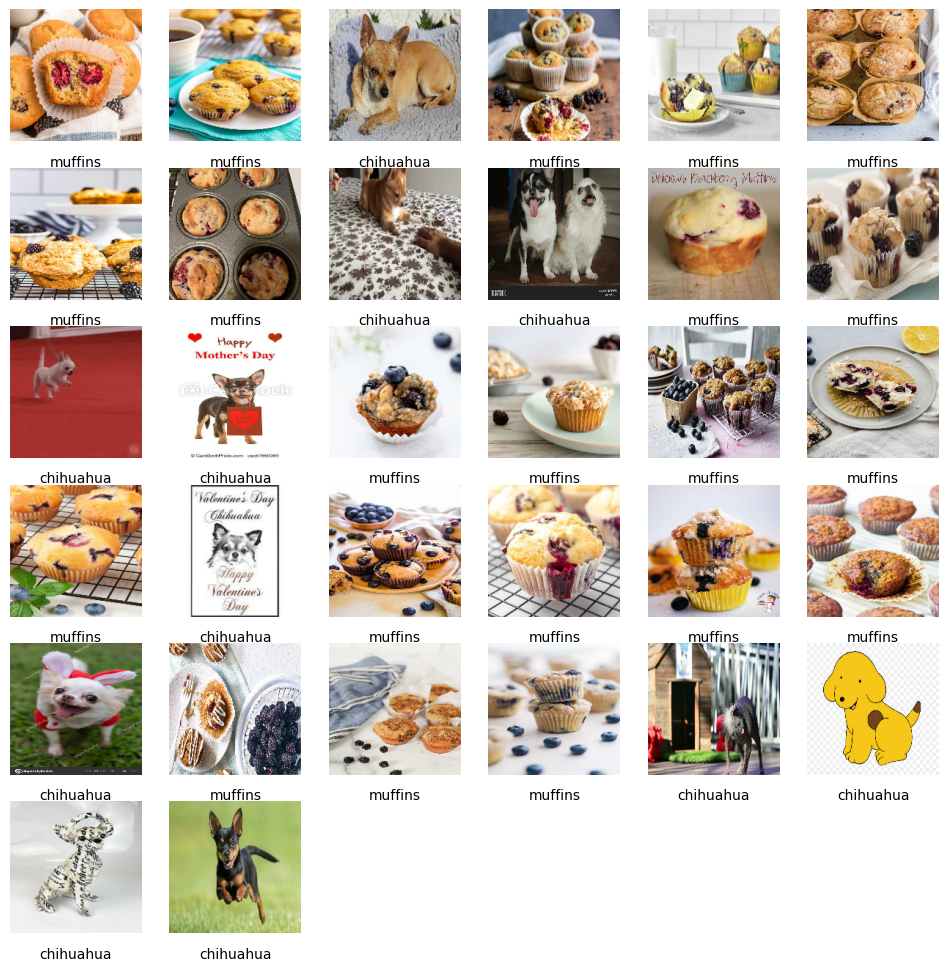

In [ ]:
for images, labels in train.take(1):
  plt.figure(figsize=(12, 12))
  for i in range(0, 32):
      ax = plt.subplot(6, 6, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.axis("off")
      plt.title(train.class_names[labels[i]],fontsize=10, y=-0.25)

In [ ]:
#ahora lo cambiamos un poco:

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
#sin usar num_classes = 10

model.add(Conv2D(32, (3,3), input_shape=(180, 180, 3), activation='relu')) #cambiamos input_shape=(32, 32, 3)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='softmax')) # aqui cambiamos num_classes por 2
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


model.summary()


resultado = model.fit(train, epochs=10) #antes lo hicimos: model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=10)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │   118,337,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,358,394 (451.50 MB)

 Trainable params: 118,358,394 (451.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6299 - loss: 4286.8115
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.7423 - loss: 48.4300
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.8486 - loss: 1.5959
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9600 - loss: 0.1573
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9969 - loss: 0.0239
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9974 - loss: 0.0222
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 1.0000 - loss: 0.0082
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9901 - loss: 0.0443
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 1.0000 - loss: 0.0014


In [ ]:
#ahora le quitamos Dense 1000 y anadimos mas model.add(Conv2D...

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

model.summary()

resultado = model.fit(train, epochs=10)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 39, 39, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 350464)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │       700,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,679,426 (6.41 MB)

 Trainable params: 1,679,426 (6.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 192ms/step - accuracy: 0.5144 - loss: 273.3499
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.5567 - loss: 0.8369
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.7029 - loss: 0.7570
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.7785 - loss: 0.4979
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.8584 - loss: 0.3591
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.8455 - loss: 0.4080
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.9201 - loss: 0.2361
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9194 - loss: 0.1772
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9223 - loss: 0.2049
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.8707 - loss: 0.3688


## COVID (✅el mismo procedimiento q Chihuahuas)

In [ ]:
from tensorflow.keras.utils  import image_dataset_from_directory
train = image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/covid/train", image_size=(180, 180))
test = image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/covid/test", image_size=(180, 180))

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
train.class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 80))

<Figure size 10000x8000 with 0 Axes>

<Figure size 10000x8000 with 0 Axes>

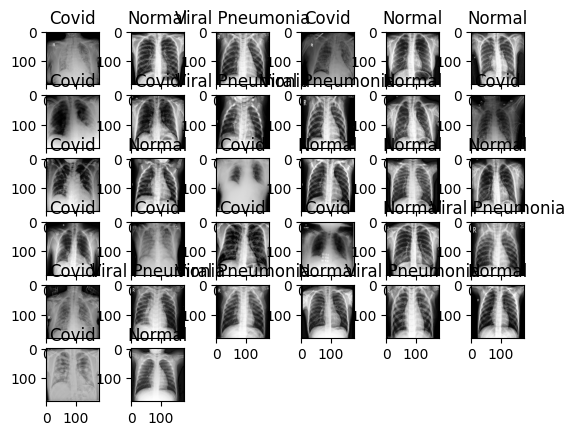

In [ ]:
for images, labels in train.take(1):
  for i in range(0, 32):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train.class_names[labels[i]])

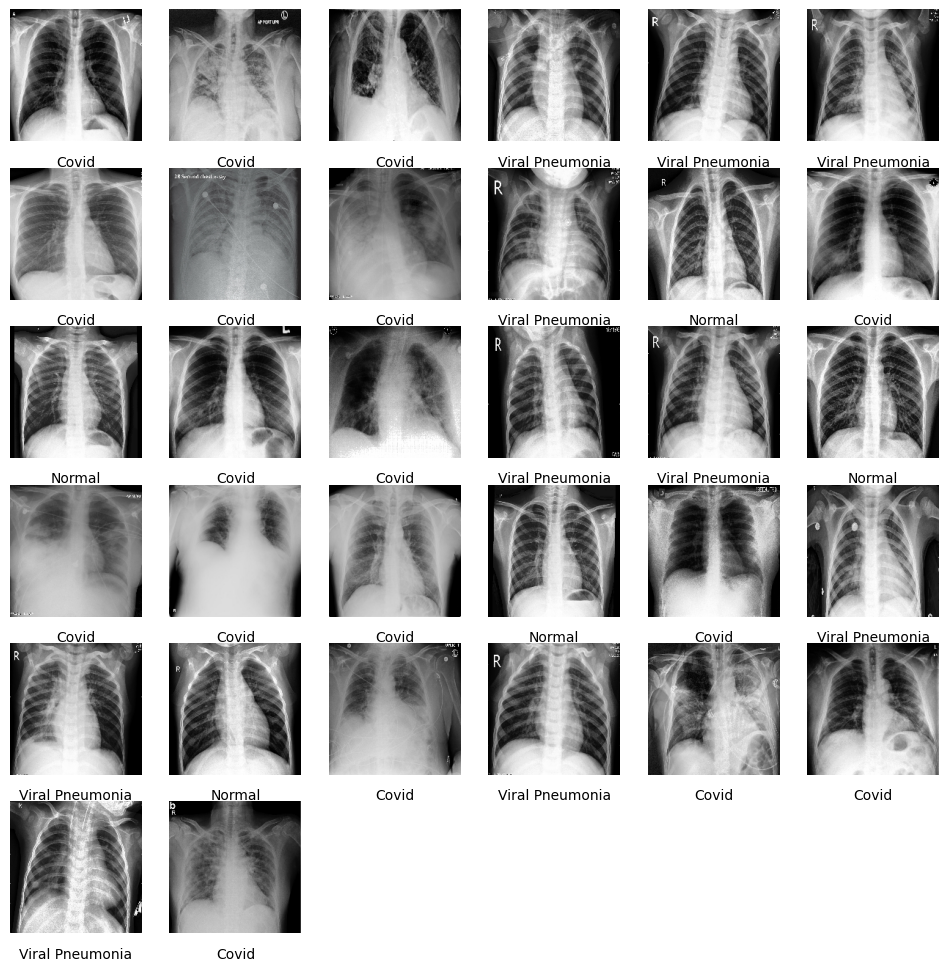

In [ ]:
for images, labels in train.take(1):
    plt.figure(figsize=(12, 12))
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        ax.set_title(train.class_names[labels[i]], fontsize=10, y=-0.25)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dense(3, activation='softmax')) # 2 clases: covid o no

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()


resultado = model.fit(train, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │   118,337,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,359,395 (451.51 MB)

 Trainable params: 118,359,395 (451.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 666ms/step - accuracy: 0.3249 - loss: 4415.2222
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 624ms/step - accuracy: 0.6523 - loss: 93.7668
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 0.8660 - loss: 1.1568
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 407ms/step - accuracy: 0.9883 - loss: 0.0277
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 509ms/step - accuracy: 1.0000 - loss: 0.0031
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 480ms/step - accuracy: 1.0000 - loss: 1.0619e-05
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 1.0000 - loss: 1.0844e-05
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 416ms/step - accuracy: 1.0000 - loss: 3.3928e-06
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - accuracy: 1.0000 - loss: 1.8909e-06
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 412ms/step - accuracy: 1.0000 - loss: 1.9572e-06


In [ ]:
resultado = model.fit(train, epochs=20)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │   118,337,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │         3,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,359,395 (451.51 MB)

 Trainable params: 118,359,395 (451.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 412ms/step - accuracy: 0.3461 - loss: 5025.0981
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step - accuracy: 0.6661 - loss: 243.7572
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.8265 - loss: 7.7345
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 440ms/step - accuracy: 0.9519 - loss: 1.0273
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 537ms/step - accuracy: 0.9591 - loss: 0.2315
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 424ms/step - accuracy: 0.9936 - loss: 0.0205
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 544ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 1.0000 - loss: 2.2632e-04
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step - accuracy: 1.0000 - loss: 8.7241e-04
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 490ms/step - accuracy: 1.0000 - loss: 1.0997e-04
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 1.0000 - loss: 4.3675e-05
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step - 

In [ ]:
test_loss, test_acc = model.evaluate(test)
print("Pérdida en test:", test_loss)
print("Accuracy en test:", test_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8578 - loss: 0.8981
Pérdida en test: 1.0242592096328735
Accuracy en test: 0.8484848737716675


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Rescaling, RandomFlip, RandomZoom

num_classes = 3  # ['Covid', 'Normal', 'Viral Pneumonia']

tf.keras.backend.clear_session()

model = Sequential()

# 1) Data augmentation + normalización
model.add(RandomFlip("horizontal", input_shape=(180, 180, 3)))
model.add(RandomZoom(0.1))
model.add(Rescaling(1./255))

# 2) Bloque 1
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# 3) Bloque 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# 4) Bloque 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# 5) En vez de Flatten enorme → GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,043 (433.76 KB)

 Trainable params: 110,595 (432.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test.cache().prefetch(buffer_size=AUTOTUNE)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    epochs=30,
    validation_data=test_ds,
    callbacks=[early_stop]
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 280ms/step - accuracy: 0.3229 - loss: 1.2805 - val_accuracy: 0.3030 - val_loss: 1.0995
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4889 - loss: 1.0351 - val_accuracy: 0.3030 - val_loss: 1.0977
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5388 - loss: 0.9043 - val_accuracy: 0.3030 - val_loss: 1.0990
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5941 - loss: 0.9188 - val_accuracy: 0.1970 - val_loss: 1.1013
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5894 - loss: 0.8771 - val_accuracy: 0.3939 - val_loss: 1.1045


## Random photos

In [ ]:
import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
# Descargad la image de un elefante y dejadla en el directorio del notebook
img_path = "/content/drive/MyDrive/Colab Notebooks/chihuahuas/test/chihuahua/img_2_1008.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
#Probad con otras fotos personales, a ver qué pasa (ImageNet cuenta con 22.000 etiquetas distintas, así que puede detectar mucho)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02085620', 'Chihuahua', np.float32(0.46533144)), ('n02113186', 'Cardigan', np.float32(0.17203248)), ('n02086910', 'papillon', np.float32(0.15569298))]


In [ ]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Transfer learning

# Clase 3.

## COVID con softmax

In [ ]:
import tensorflow as tf

conv_base = tf.keras.applications.resnet50.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Data augmentation q sirve para mover con el dibujo de gato pa q no se acostubre a un dibujo sino q lo vaya cambiando
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.02),
])

# Base convolucional (si no la tienes ya definida)
conv_base = keras.applications.resnet50.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)
conv_base.trainable = False  # congelada al principio

# Modelo
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(x)

x = conv_base(x, training=False)

# Mejor que Flatten: más estable y menos NaNs
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x) #la capa dropout va a borrar 50% de conexiones pq quiere evitar q se sobrecargue ??? lo debo usar cuando ya se lo aprende de memoria el test pq tengo poco en test y mas en train???

outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)


model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_5        │ (None, 180, 180,  │          0 │ input_layer_19[0… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_15         │ (None, 180, 180)  │          0 │ sequential_5[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_16         │ (None, 180, 180)  │          0 │ sequential_5[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_17         │ (None, 180, 180)  │          0 │ sequential_5[0][… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_5 (Stack)     │ (None, 180, 180,  │          0 │ get_item_15[0][0… │
│                     │ 3)                │            │ get_item_16[0][0… │
│                     │                   │            │ get_item_17[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 180, 180,  │          0 │ stack_5[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 6, 6,      │ 23,587,712 │ add_5[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 256)       │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 3)         │        771 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory



train = image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/covid/train", image_size=(180, 180),
    batch_size=32)
test = image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/covid/test", image_size=(180, 180),
    batch_size=32)


# Compilar el modelo
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Entrenar
resultado = model.fit(
    train,
    validation_data=test,
    epochs=10
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 954ms/step - accuracy: 0.5555 - loss: 1.6030 - val_accuracy: 0.7879 - val_loss: 0.5806
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.8051 - loss: 0.4202 - val_accuracy: 0.8030 - val_loss: 0.4069
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 512ms/step - accuracy: 0.8943 - loss: 0.3086 - val_accuracy: 0.8939 - val_loss: 0.2405
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 867ms/step - accuracy: 0.8924 - loss: 0.3089 - val_accuracy: 0.9242 - val_loss: 0.1958
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 508ms/step - accuracy: 0.9253 - loss: 0.2571 - val_accuracy: 0.9697 - val_loss: 0.1217
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 612ms/step - accuracy: 0.9615 - loss: 0.1410 - val_accuracy: 0.9394 - val_loss: 0.1792
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - accuracy: 0.9434 - loss: 0.1715 - val_accuracy: 0.9697 - val_loss: 0.1288
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s

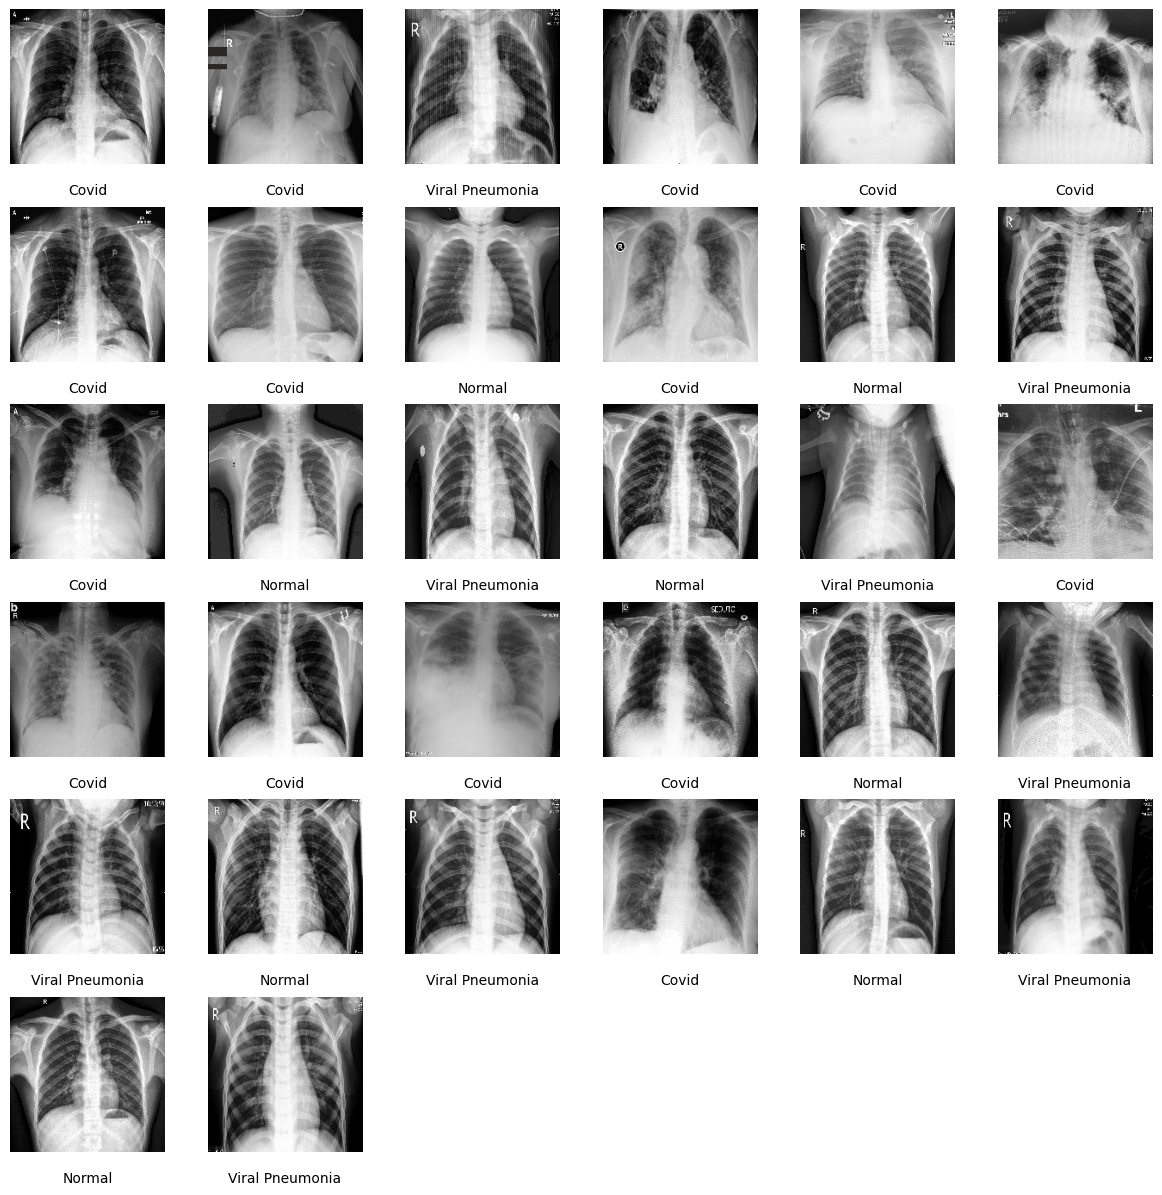

In [ ]:
#hecho con chatgpt a base de clase 2.
import matplotlib.pyplot as plt

for images, labels in train.take(1):
    plt.figure(figsize=(12, 12))
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        ax.set_title(train.class_names[int(labels[i])], fontsize=10, y=-0.25)
    plt.tight_layout()
    plt.show()


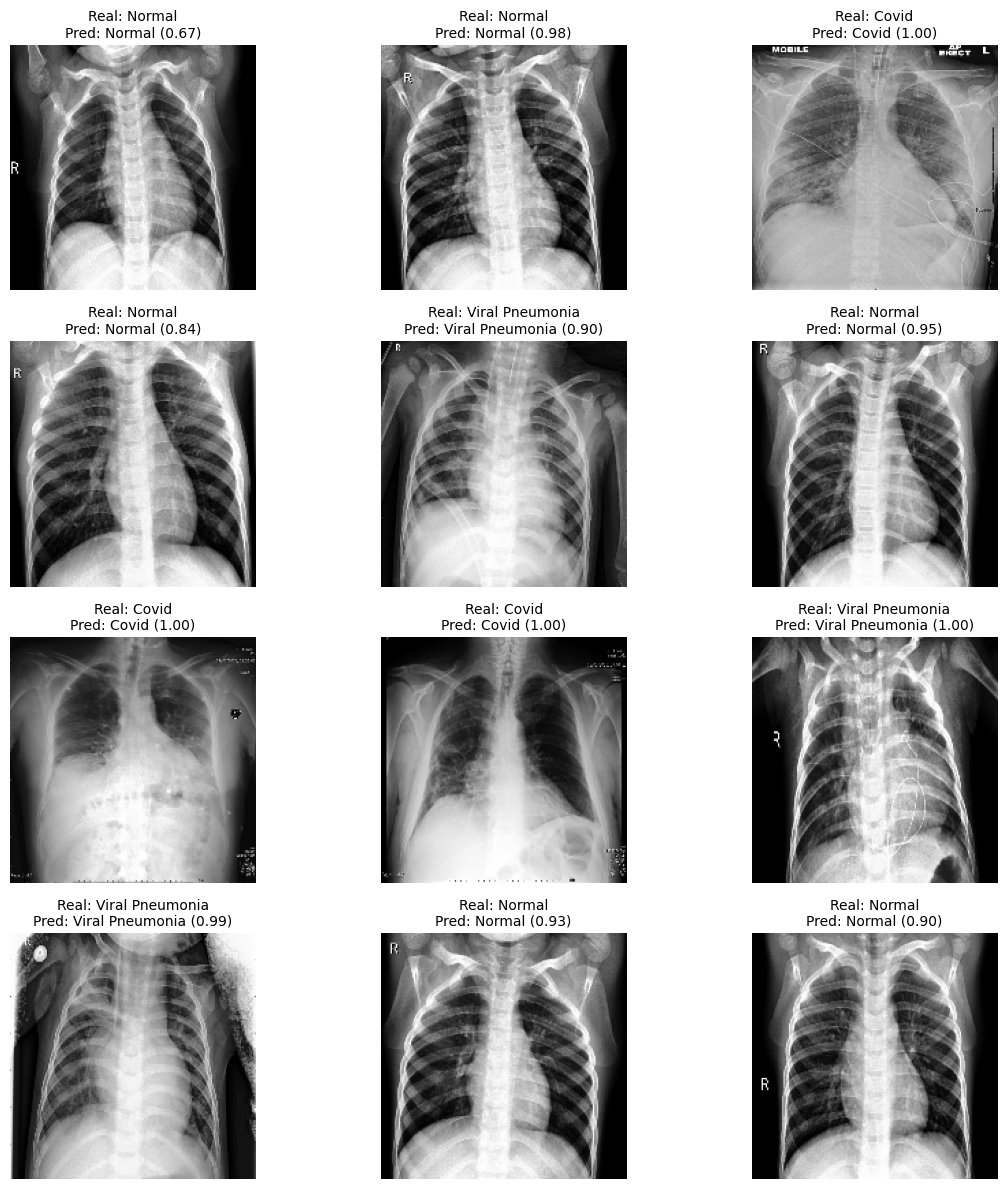

In [ ]:
#hecho con chatgpt
import numpy as np
import matplotlib.pyplot as plt

class_names = test.class_names

for images, labels in test.take(1):
    probs = model.predict(images, verbose=0)
    preds = np.argmax(probs, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

        real = class_names[int(labels[i])]
        pred = class_names[int(preds[i])]
        conf = float(np.max(probs[i]))

        ax.set_title(f"Real: {real}\nPred: {pred} ({conf:.2f})", fontsize=10)
    plt.tight_layout()
    plt.show()

## Espectogramas

mirar power: Redes Neuronales Convolucionales 2.pdf

In [ ]:
import wave
import io
import os
import random
import numpy as np
import matplotlib.pyplot as plt

dirs = os.listdir("data")

for dir_name in dirs:
    path = os.path.join("data", dir_name)

    if not os.path.isdir(path):
        continue

    files = os.listdir(path)

    for file in files:
        print(file)

        if random.randint(0, 100) < 20:
            pathimgs = "images/test/"
        else:
            pathimgs = "images/train/"

In [ ]:
with wave.open(path + "/" + file, 'rb') as f:
    fs = f.getframerate()
    nf = f.getnframes()
    ns = nf / float(fs)

    wavebytes = np.frombuffer(f.readframes(-1), dtype=np.int16)

numero = file.split("_")[0]

plt.axis('off')
plt.specgram(wavebytes, NFFT=256, Fs=fs)

if not os.path.exists(pathimgs + "/" + numero):
    os.makedirs(pathimgs + "/" + numero)

plt.savefig(
    pathimgs + "/" + numero + "/" + file.replace(".wav", ".png"),
    bbox_inches="tight",
    pad_inches=0
)

plt.close()

# Clase 4.

## eeg

### basics

In [ ]:
import pandas as pd

eeg = pd.read_csv(
    "/content/eeg-data.csv",
    engine="python",
    on_bad_lines="skip"   # salta filas problemáticas
)

print(eeg.shape)

(25032, 13)


In [ ]:
eeg.head(5)

Unnamed: 0  id               indra_time browser_latency  \
0        3730  12  2015-05-09 23:13:42.281            1461   
1        3732  12  2015-05-09 23:13:43.186            1461   
2        3734  12  2015-05-09 23:13:44.392            1461   
3        3735  12  2015-05-09 23:13:45.297            1461   
4        3737  12  2015-05-09 23:13:46.201            1460   

              reading_time  attention_esense  meditation_esense  \
0  2015-05-09 16:13:40.954                 0                  0   
1  2015-05-09 16:13:41.964                 0                  0   
2  2015-05-09 16:13:42.950                 0                  0   
3  2015-05-09 16:13:43.935                 0                  0   
4  2015-05-09 16:13:44.936                 0                  0   

                                           eeg_power  \
0  [944412.0, 111373.0, 52404.0, 28390.0, 3237.0,...   
1  [1793049.0, 89551.0, 3896.0, 21727.0, 9301.0, ...   
2  [400192.0, 640624.0, 153087.0, 69733.0, 98854....   
3  [681192.0, 138630.0, 67891.0, 26459.0, 592240....   
4  [268406.0, 197772.0, 190654.0, 266433.0, 91683...   

                                          raw_values  signal_quality  \
0  [-203.0, -202.0, -196.0, -185.0, -163.0, -137....             200   
1  [104.0, 134.0, 128.0, 121.0, 145.0, 151.0, 123...             200   
2  [2002.0, 2047.0, 2047.0, 2047.0, 2047.0, 2047....             200   
3  [1287.0, 1241.0, 1196.0, 1155.0, 1113.0, 1072....             200   
4  [1905.0, 1836.0, 1770.0, 1707.0, 1645.0, 1587....             200   

                 createdAt                   updatedAt      label  
0  2015-05-09 23:13:39.550  2015-05-09 23:13:39.549+00  unlabeled  
1  2015-05-09 23:13:40.559  2015-05-09 23:13:40.559+00  unlabeled  
2  2015-05-09 23:13:41.549  2015-05-09 23:13:41.549+00  unlabeled  
3  2015-05-09 23:13:42.532  2015-05-09 23:13:42.532+00  unlabeled  
4  2015-05-09 23:13:43.532  2015-05-09 23:13:43.532+00  unlabeled

In [ ]:
# Quedarnos con las columnas importantes
eeg = eeg[['id', 'eeg_power', 'raw_values', 'signal_quality', 'label']]

# Filtrar por calidad de señal. Nos quedamos con los valores que tenga un umbral de 128 en cuanto a calidad
# 0 = mejor calidad, 200 = peor calidad
eeg = eeg[eeg["signal_quality"] <= 128]

In [ ]:
eeg.replace({"label": {
  "blink1": "blink", "blink2": "blink", "blink3": "blink", "blink4": "blink", "blink5": "blink",
  "math1": "math", "math2": "math", "math3": "math", "math4": "math", "math5": "math", "math6": "math", "math7": "math", "math8": "math", "math9": "math", "math10": "math",
"math11": "math", "math12": "math",
  "thinkOfItems-ver1": "thinkOfItems", "thinkOfItems-ver2": "thinkOfItems",
  "video-ver1": "video", "video-ver2": "video",
  "thinkOfItemsInstruction-ver1": "thinkOfItemsInstruction", "thinkOfItemsInstruction-ver2": "thinkOfItemsInstruction",
  "colorRound1-1": "colorRound1", "colorRound1-2": "colorRound1", "colorRound1-3": "colorRound1", "colorRound1-4": "colorRound1", "colorRound1-5": "colorRound1",
"colorRound1-6": "colorRound1",
  "colorRound2-1": "colorRound2", "colorRound2-2": "colorRound2", "colorRound2-3": "colorRound2", "colorRound2-4": "colorRound2", "colorRound2-5": "colorRound2",
"colorRound2-6": "colorRound2",
  "colorRound3-1": "colorRound3", "colorRound3-2": "colorRound3", "colorRound3-3": "colorRound3", "colorRound3-4": "colorRound3", "colorRound3-5": "colorRound3",
"colorRound3-6": "colorRound3",
  "colorRound4-1": "colorRound4", "colorRound4-2": "colorRound4", "colorRound4-3": "colorRound4", "colorRound4-4": "colorRound4", "colorRound4-5": "colorRound4",
"colorRound4-6": "colorRound4",
  "colorRound5-1": "colorRound5", "colorRound5-2": "colorRound5", "colorRound5-3": "colorRound5", "colorRound5-4": "colorRound5", "colorRound5-5": "colorRound5",
"colorRound5-6": "colorRound5",
  "colorInstruction1": "colorInstruction", "colorInstruction2": "colorInstruction",
  "readyRound1": "readyRound", "readyRound2": "readyRound", "readyRound3": "readyRound", "readyRound4": "readyRound", "readyRound5": "readyRound",
  "colorRound1": "colorRound", "colorRound2": "colorRound", "colorRound3": "colorRound", "colorRound4": "colorRound", "colorRound5": "colorRound",}
},inplace=True)

### Json

In [ ]:
import json
eeg["raw_values"] = eeg["raw_values"].apply(lambda c: json.loads(c))
valores = np.asarray([np.asarray(valores).astype("float") for valores in eeg["raw_values"]])
num_classes = len(eeg["label"].unique())
print(num_classes)
labels = eeg["label"].astype("category").cat.codes
valores = valores.reshape(-1, 512, 1)


from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(valores, labels, train_size = 0.8)

20


### Keras

In [ ]:
from keras.layers import Input, Conv1D, BatchNormalization, Dropout, Flatten, Dense
from keras import Model

input_layer = Input(shape=(512, 1))

x = Conv1D(32, kernel_size=5, strides=2, activation="relu", padding="same")(input_layer)
x = BatchNormalization()(x) # BatchNormalization: Normaliza las salidas de una capa para que tengan media ≈ 0 y varianza ≈ 1 dentro de cada batch. Se usa si tienes muchas capas y evita que el entrenamiento sea inestable y  acelera la convergencia

x = Conv1D(64, kernel_size=5, strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)

x = Conv1D(128, kernel_size=5, strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)

x = Conv1D(256, kernel_size=5, strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)

x = Conv1D(512, kernel_size=5, strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)

x = Conv1D(1024, kernel_size=5, strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)

x = Dropout(0.2)(x)
x = Flatten()(x)

x = Dense(4096, activation="relu")(x)
x = Dropout(0.2)(x)

x = Dense(2048, activation="relu")(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)

x = Dense(128, activation="relu")(x)

output_layer = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 512, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_24 (Conv1D)              │ (None, 256, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ (None, 128, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ (None, 64, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 64, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 32, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 16, 512)        │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 16, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_29 (Conv1D)              │ (None, 8, 1024)        │     2,622,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 8, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4096)           │    33,558,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       131,20

 Total params: 47,683,220 (181.90 MB)

 Trainable params: 47,679,188 (181.88 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [ ]:
history = model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=20,
    batch_size=64
)

Epoch 1/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7063 - loss: 1.0598 - val_accuracy: 0.6779 - val_loss: 1.6020
Epoch 2/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7253 - loss: 0.9101 - val_accuracy: 0.6691 - val_loss: 1.6869
Epoch 3/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7516 - loss: 0.7702 - val_accuracy: 0.6506 - val_loss: 1.9542
Epoch 4/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7784 - loss: 0.6775 - val_accuracy: 0.5987 - val_loss: 2.1464
Epoch 5/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8006 - loss: 0.6003 - val_accuracy: 0.6294 - val_loss: 2.1006
Epoch 6/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8396 - loss: 0.4846 - val_accuracy: 0.6387 - val_loss: 2.2663
Epoch 7/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8710 - loss: 0.3948 - val_accuracy: 0.6089 - val_loss: 2.5665
Epoch 8/20
294/294 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8939 - loss: 0.3269 - val_accu

### LSTM de eeg

In [ ]:
import pandas as pd
import numpy as np
eeg = pd.read_csv(
    "/content/eeg-data.csv",
    engine="python",
    on_bad_lines="skip"   # salta filas problemáticas
)

In [ ]:
# Vamos a quitar las etiquetas no válidas
eeg = eeg[(eeg["label"] != "unlabeled") & (eeg["label"] != "everyone paired")]
# Nos quedamos con las columnas importantes
eeg = eeg[['id', 'eeg_power', "raw_values", 'signal_quality', 'label']]
# Nos quedamos con los valores que tenga un umbral de 128 en cuanto a calidad
# La calidad va de 0 (la mejor) a 200 (el peor)
eeg = eeg[eeg["signal_quality"] <= 128]

In [ ]:
eeg.replace({"label": {
  "blink1": "blink", "blink2": "blink", "blink3": "blink", "blink4": "blink", "blink5": "blink",
  "math1": "math", "math2": "math", "math3": "math", "math4": "math", "math5": "math", "math6": "math", "math7": "math", "math8": "math", "math9": "math", "math10": "math",
"math11": "math", "math12": "math",
  "thinkOfItems-ver1": "thinkOfItems", "thinkOfItems-ver2": "thinkOfItems",
  "video-ver1": "video", "video-ver2": "video",
  "thinkOfItemsInstruction-ver1": "thinkOfItemsInstruction", "thinkOfItemsInstruction-ver2": "thinkOfItemsInstruction",
  "colorRound1-1": "colorRound1", "colorRound1-2": "colorRound1", "colorRound1-3": "colorRound1", "colorRound1-4": "colorRound1", "colorRound1-5": "colorRound1",
"colorRound1-6": "colorRound1",
  "colorRound2-1": "colorRound2", "colorRound2-2": "colorRound2", "colorRound2-3": "colorRound2", "colorRound2-4": "colorRound2", "colorRound2-5": "colorRound2",
"colorRound2-6": "colorRound2",
  "colorRound3-1": "colorRound3", "colorRound3-2": "colorRound3", "colorRound3-3": "colorRound3", "colorRound3-4": "colorRound3", "colorRound3-5": "colorRound3",
"colorRound3-6": "colorRound3",
  "colorRound4-1": "colorRound4", "colorRound4-2": "colorRound4", "colorRound4-3": "colorRound4", "colorRound4-4": "colorRound4", "colorRound4-5": "colorRound4",
"colorRound4-6": "colorRound4",
  "colorRound5-1": "colorRound5", "colorRound5-2": "colorRound5", "colorRound5-3": "colorRound5", "colorRound5-4": "colorRound5", "colorRound5-5": "colorRound5",
"colorRound5-6": "colorRound5",
  "colorInstruction1": "colorInstruction", "colorInstruction2": "colorInstruction",
  "readyRound1": "readyRound", "readyRound2": "readyRound", "readyRound3": "readyRound", "readyRound4": "readyRound", "readyRound5": "readyRound",
  "colorRound1": "colorRound", "colorRound2": "colorRound", "colorRound3": "colorRound", "colorRound4": "colorRound", "colorRound5": "colorRound",}
},inplace=True)

In [ ]:
# Los valores están en un array de 512 elementos en la columna raw_values
import json
import numpy as np
eeg["raw_values"] = eeg["raw_values"].apply(lambda c: json.loads(c))

# Los convertimos en arrays puros en vez de en arrays de listas
valores = np.asarray([np.asarray(valores).astype("float") for valores in eeg["raw_values"]])

# Convertimos las etiquetas en valores numéricos
num_classes = len(eeg["label"].unique())
print(num_classes)
labels = eeg["label"].astype('category').cat.codes

# Convertimos a un array de listas de 64 valores de 8 elementos
valores = valores.reshape(-1, 64, 8)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(valores, labels, train_size = 0.8)


19


In [ ]:

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, LSTM, Input, Dropout
input_layer = Input(shape=(64, 8))
x = LSTM(128)(input_layer)
x = Dense(4096, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(128, activation="relu")(x)
output_layer = Dense(num_classes, activation="softmax")(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=30)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │       528,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 19)             │         2,451 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,221,011 (42.80 MB)

 Trainable params: 11,221,011 (42.80 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.0913 - loss: 2.8111 - val_accuracy: 0.0979 - val_loss: 2.8320
Epoch 2/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1012 - loss: 2.7612 - val_accuracy: 0.0889 - val_loss: 2.7599
Epoch 3/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1012 - loss: 2.7370 - val_accuracy: 0.1045 - val_loss: 2.7490
Epoch 4/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1123 - loss: 2.7222 - val_accuracy: 0.1095 - val_loss: 2.7542
Epoch 5/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1081 - loss: 2.7138 - val_accuracy: 0.1055 - val_loss: 2.7502
Epoch 6/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.1281 - loss: 2.6809 - val_accuracy: 0.1145 - val_loss: 2.7891
Epoch 7/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1490 - loss: 2.6467 - val_accuracy: 0.1060 - val_loss: 2.7643
Epoch 8/30
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1579 - loss: 2.6135 - val_accu

## LSTM - red electrica

LSTM (Long Short-Term Memory) es un tipo especial de red neuronal recurrente (RNN) diseñada para aprender dependencias temporales largas.

👉 sirve para entender datos que vienen en secuencia y donde el orden importa.

- Las **RNN** normales se olvidan rápido (gradiente que desaparece).
- **LSTM** introduce una “memoria” que decide:
    * qué guardar INPUT
    * qué olvidar
    * qué usar ahora OUTPUT

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM

elect = pd.read_csv("https://www.ree.es/sites/default/files/datos/Brutos_Sep2025.csv",
sep=";", decimal=",", encoding="latin1", skiprows=3)


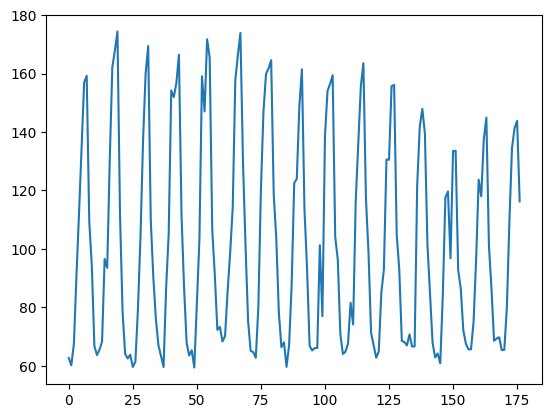

In [ ]:
from matplotlib import pyplot as plt
plt.plot(elect["OTR_PRI"])
# Vamos a reescalar los datos (recuerda que hay una tanh dentro de la LSTM)
rescalado = (elect["OTR_PRI"]/elect["OTR_PRI"].max()).values

In [ ]:
import numpy as np
def devuelve_bloques(data, tam_bloque):
  bloques = []
  for i in range(len(data) - tam_bloque):
    bloques.append(data[i:i+tam_bloque])
  return np.array(bloques)
bloques = devuelve_bloques(rescalado, 10)

In [ ]:
y = []
for i in range(len(bloques) - 1):
  y.append(bloques[i + 1][-1])

In [ ]:
x = bloques[:-1]
print(x.shape)

(166, 10)


In [ ]:
x1 = bloques[:-1]
x1 = x1.reshape(x1.shape[0], 1, x1.shape[1])
y = np.array(y)
model = Sequential()
model.add(LSTM(4, input_shape=(1, 10)))
model.add(Dense(1))
model.compile(loss='mse', metrics=["mae"])
model.summary()
history1 = model.fit(x1, y, epochs=100, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4)              │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (980.00 B)

 Trainable params: 245 (980.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.2613 - mae: 0.4694 - val_loss: 0.1725 - val_mae: 0.3851
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2189 - mae: 0.4206 - val_loss: 0.1496 - val_mae: 0.3540
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1847 - mae: 0.3824 - val_loss: 0.1301 - val_mae: 0.3250
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1616 - mae: 0.3506 - val_loss: 0.1127 - val_mae: 0.2966
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1633 - mae: 0.3485 - val_loss: 0.0981 - val_mae: 0.2705
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1293 - mae: 0.2990 - val_loss: 0.0835 - val_mae: 0.2417
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1104 - mae: 0.2690 - val_loss: 0.0707 - val_mae: 0.2131
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0932 - mae: 0.2312 - val_loss: 0.0596 - val_mae: 0.1852
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0820 - mae:

In [ ]:
predicciones = model.predict(x1, verbose=0).ravel()   # (n,1) -> (n,)
print(predicciones[:10])

[0.4799853  0.33439815 0.30056083 0.3816303  0.51850307 0.60216737
 0.7759826  0.78976786 0.82609737 0.8298657 ]


In [ ]:
x2 = bloques[:-1]
x2 = x2.reshape(x2.shape[0], x2.shape[1], 1)
y = np.array(y)
model2 = Sequential()
model2.add(LSTM(4, input_shape=(10, 1)))
model2.add(Dense(1))
model2.compile(loss='mse', metrics=["mae"])
model2.summary()
history2 = model2.fit(x2, y, epochs=100, validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.7610 - mae: 0.8411 - val_loss: 0.5619 - val_mae: 0.7286
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6845 - mae: 0.7923 - val_loss: 0.5185 - val_mae: 0.6983
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6191 - mae: 0.7524 - val_loss: 0.4858 - val_mae: 0.6746
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6110 - mae: 0.7458 - val_loss: 0.4591 - val_mae: 0.6546
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5489 - mae: 0.7081 - val_loss: 0.4342 - val_mae: 0.6354
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5443 - mae: 0.7022 - val_loss: 0.4116 - val_mae: 0.6175
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5034 - mae: 0.6710 - val_loss: 0.3910 - val_mae: 0.6007
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4945 - mae: 0.6677 - val_loss: 0.3721 - val_mae: 0.5848
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4589 - mae: 

In [ ]:
predicciones2= model2.predict(x2, verbose=0).ravel()
print(predicciones2[:10])

[0.583103   0.5578271  0.5500088  0.55174524 0.5604768  0.5859443
 0.5975976  0.62902343 0.65412694 0.65060365]


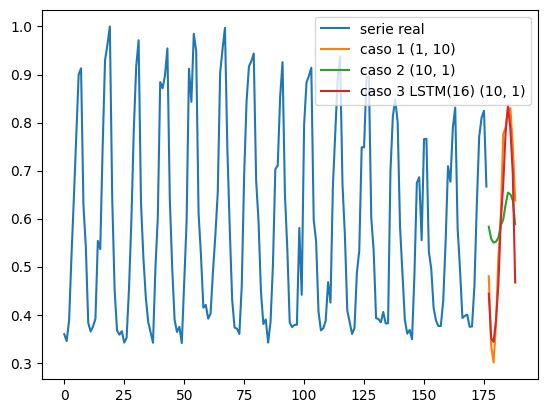

In [ ]:
h = 12
x_futuro = list(range(len(rescalado), len(rescalado) + h))

plt.plot(rescalado, label="serie real")

plt.plot(
    x_futuro,
    np.array(predicciones).ravel()[:h],
    label="caso 1 (1, 10)"
)

plt.plot(
    x_futuro,
    np.array(predicciones2).ravel()[:h],
    label="caso 2 (10, 1)"
)

plt.plot(
    x_futuro,
    np.array(predicciones3).ravel()[:h],
    label="caso 3 LSTM(16) (10, 1)"
)

plt.legend()
plt.show()

#en el power es así:
plt.plot(rescalado)
plt.plot(list(range(len(rescalado), len(rescalado) + 12)), predicciones, label="caso 1 (1, 10)")
plt.plot(list(range(len(rescalado), len(rescalado) + 12)), predicciones2, label="caso 2 (10, 1)")
plt.legend()


In [ ]:
model3 = Sequential()
model3.add(LSTM(16, input_shape=(10, 1)))
model3.add(Dense(1))
model3.compile(loss='mse', metrics=["mae"])
model3.summary()
history3 = model3.fit(x2, y, epochs=100, validation_split=0.2)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.3089 - mae: 0.5162 - val_loss: 0.1637 - val_mae: 0.3720
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2049 - mae: 0.3996 - val_loss: 0.1064 - val_mae: 0.2828
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1254 - mae: 0.2886 - val_loss: 0.0716 - val_mae: 0.2101
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0928 - mae: 0.2240 - val_loss: 0.0498 - val_mae: 0.1636
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0810 - mae: 0.2181 - val_loss: 0.0361 - val_mae: 0.1516
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0597 - mae: 0.1968 - val_loss: 0.0302 - val_mae: 0.1561
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0500 - mae: 0.1945 - val_loss: 0.0315 - val_mae: 0.1643
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0494 - mae: 0.1960 - val_loss: 0.0318 - val_mae: 0.1653
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0528 - mae: 

In [ ]:
predicciones3= model3.predict(x2, verbose=0).ravel()
print(predicciones3[:10])

[0.44380492 0.35089648 0.343526   0.38843113 0.46290284 0.594982
 0.6695665  0.7782872  0.8359201  0.7859087 ]


# Clase 5. (todo trabajos individuales - sin realizar correcciones)

## Air passengers (se hace igual q en clase pasada LSTM de red electrica)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/AirPassengers.csv")
df.head(2)

Month  #Passengers
0  1949-01          112
1  1949-02          118

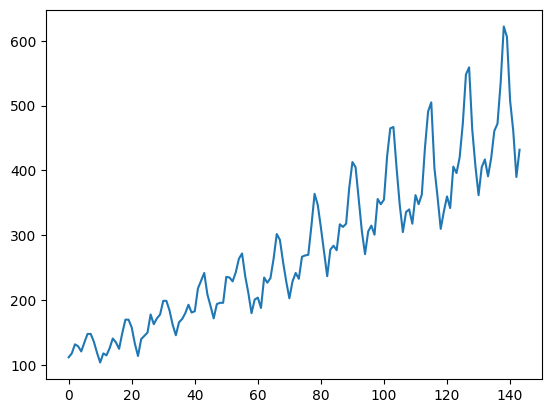

In [ ]:
from matplotlib import pyplot as plt
plt.plot(df["#Passengers"])

In [ ]:
## 1) Preparar serie y escalar
df["Month"] = pd.to_datetime(df["Month"])
df = df.sort_values("Month").reset_index(drop=True)

serie = df["#Passengers"].astype(float).values  # (N,)

scaler = MinMaxScaler(feature_range=(0, 1))
rescalado = scaler.fit_transform(serie.reshape(-1, 1)).ravel()  # (N,)

In [ ]:
# 2) Bloques (ventanas)
def devuelve_bloques(data, tam_bloque):
    bloques = []
    for i in range(len(data) - tam_bloque):
        bloques.append(data[i:i+tam_bloque])
    return np.array(bloques)

tam_bloque = 10
bloques = devuelve_bloques(rescalado, tam_bloque) # (N-10, 10)

In [ ]:
# y = siguiente valor (último del bloque siguiente)
y = []
for i in range(len(bloques) - 1):
    y.append(bloques[i + 1][-1])
y = np.array(y)

# X raw = todos los bloques menos el último
x_raw = bloques[:-1]  # (muestras, 10)

In [ ]:
#Caso 1 (1, 10) -> model1
x1 = x_raw.reshape(x_raw.shape[0], 1, x_raw.shape[1])  # (muestras, 1, 10)

model1 = Sequential()
model1.add(LSTM(4, input_shape=(1, 10)))
model1.add(Dense(1))
model1.compile(loss="mse", metrics=["mae"])
history1 = model1.fit(x1, y, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0432 - mae: 0.1630 - val_loss: 0.1830 - val_mae: 0.3887
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0360 - mae: 0.1376 - val_loss: 0.1511 - val_mae: 0.3450
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0290 - mae: 0.1187 - val_loss: 0.1282 - val_mae: 0.3099
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0194 - mae: 0.0943 - val_loss: 0.1116 - val_mae: 0.2819
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0175 - mae: 0.0893 - val_loss: 0.0963 - val_mae: 0.2539
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0158 - mae: 0.0861 - val_loss: 0.0855 - val_mae: 0.2331
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0143 - mae: 0.0831 - val_loss: 0.0764 - val_mae: 0.2145
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0123 - mae: 0.0785 - val_loss: 0.0695 - val_mae: 0.2022
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0134 - mae: 0.0838 - va

In [ ]:
predicciones1 = []

ventana = rescalado[-tam_bloque:].copy()  # últimos 10 valores escalados

for _ in range(12):
    inp = ventana.reshape(1, 1, 10)
    yhat = model1.predict(inp, verbose=0)[0, 0]
    predicciones1.append(float(yhat))
    ventana = np.append(ventana[1:], yhat)

In [ ]:
x2 = bloques[:-1]
x2 = x2.reshape(x2.shape[0], x2.shape[1], 1)

# y: a numpy
y = np.array(y)

model2 = Sequential()
model2.add(LSTM(4, input_shape=(10, 1)))
model2.add(Dense(1))
model2.compile(loss="mse", metrics=["mae"])
model2.summary()

history2 = model2.fit(x2, y, epochs=100, validation_split=0.2, verbose=1)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - loss: 0.0525 - mae: 0.1901 - val_loss: 0.1512 - val_mae: 0.3638
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0347 - mae: 0.1489 - val_loss: 0.1241 - val_mae: 0.3246
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0237 - mae: 0.1168 - val_loss: 0.1031 - val_mae: 0.2906
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0222 - mae: 0.1074 - val_loss: 0.0859 - val_mae: 0.2594
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0146 - mae: 0.0871 - val_loss: 0.0733 - val_mae: 0.2337
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0132 - mae: 0.0817 - val_loss: 0.0619 - val_mae: 0.2086
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0138 - mae: 0.0856 - val_loss: 0.0551 - val_mae: 0.1929
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0115 - mae: 0.0780 - val_loss: 0.0502 - val_mae: 0.1805
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0105 - mae:

In [ ]:
predicciones2 = []

ventana = rescalado[-tam_bloque:].copy()

for _ in range(12):
    inp = ventana.reshape(1, 10, 1)
    yhat = model2.predict(inp, verbose=0)[0, 0]
    predicciones2.append(float(yhat))
    ventana = np.append(ventana[1:], yhat)

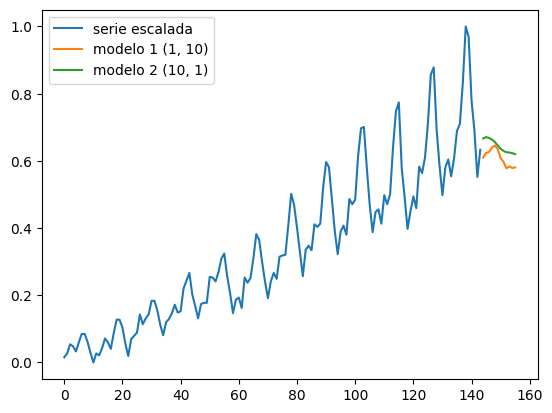

In [ ]:
import matplotlib.pyplot as plt

plt.plot(rescalado, label="serie escalada")


## Beijing (repaso de todo Machine learning)

In [1]:
import pandas as pd
df = pd.read_csv("/content/beijing.csv")
df.head(5)

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

### basics

In [2]:
df = df.drop(columns= ("No"))

In [3]:
df.head(5)

year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [4]:
df = pd.get_dummies(df, columns=["cbwd"])

In [5]:
df = pd.get_dummies(df, columns=["year"])

In [6]:
df = pd.get_dummies(df, columns=["day"])

In [7]:
df = pd.get_dummies(df, columns=["month"])

In [8]:
df = pd.get_dummies(df, columns=["hour"])

In [9]:
df.isna().sum()

pm2.5      2067
DEWP          0
TEMP          0
PRES          0
Iws           0
           ... 
hour_19       0
hour_20       0
hour_21       0
hour_22       0
hour_23       0
Length: 83, dtype: int64

In [10]:
df["pm2.5"].fillna(df["pm2.5"].mean(), inplace=True)

/tmp/ipython-input-4283001937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["pm2.5"].fillna(df["pm2.5"].mean(), inplace=True)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

pm2.5      DEWP      TEMP      PRES       Iws   Is   Ir  cbwd_NE  \
0  0.099208  0.279412  0.131148  0.545455  0.002290  0.0  0.0      0.0   
1  0.099208  0.279412  0.114754  0.527273  0.007639  0.0  0.0      0.0   
2  0.099208  0.279412  0.131148  0.509091  0.010698  0.0  0.0      0.0   
3  0.099208  0.279412  0.081967  0.509091  0.016047  0.0  0.0      0.0   
4  0.099208  0.294118  0.114754  0.490909  0.021396  0.0  0.0      0.0   

   cbwd_NW  cbwd_SE  ...  hour_14  hour_15  hour_16  hour_17  hour_18  \
0      1.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
1      1.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
2      1.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
3      1.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   
4      1.0      0.0  ...      0.0      0.0      0.0      0.0      0.0   

   hour_19  hour_20  hour_21  hour_22  hour_23  
0      0.0      0.0      0.0      0.0      0.0  
1      0.0      0.0      0.0      0.0      0.0  
2      0.0      0.0      0.0      0.0      0.0  
3      0.0      0.0      0.0      0.0      0.0  
4      0.0      0.0      0.0      0.0      0.0  

[5 rows x 83 columns]

In [12]:
X = df.drop(columns=["pm2.5"])
y = df["pm2.5"]

### LinearRegression

In [13]:
#PODEMOS hacer regresion, decisiontree y/o convulocional
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [15]:
lr.score(X, y)

0.39056727512377054

In [16]:
lr.coef_

array([ 7.43503917e+00, -2.87334392e+00, -1.90425064e+00, -9.90189323e-02,
       -5.30503825e+00, -5.91671554e+00, -5.59665922e+00, -7.90548704e+00,
        4.84655901e+00,  8.65558725e+00,  5.60360441e+00,  3.67739324e-01,
       -1.04965914e+01,  4.68064563e+00, -1.55398014e-01, -9.42334480e+00,
       -1.39600627e+01, -6.65777786e+00, -1.33385170e+01, -8.46824203e+00,
        1.42350020e+00, -2.38719691e+00, -3.62302552e+00,  2.84719875e+00,
       -7.38179627e+00, -1.01497202e+01, -5.65672492e+00, -5.36086672e+00,
       -2.86111328e+00,  6.57539994e+00,  3.89325873e+00, -4.51132620e+00,
        8.79534854e+00,  6.37057425e+00,  5.14980275e+00,  9.93126238e+00,
        7.21325656e+00,  1.47069751e+01,  2.10137437e+00,  2.88500713e+00,
        3.61419765e+00,  3.45491254e+00,  1.00895400e+01,  5.61192251e+00,
        3.91486034e+00, -4.79867725e+00,  1.25820223e+02,  1.14033856e+02,
        6.82737098e+01,  1.03324000e+01, -4.97849665e+01, -9.93284068e+01,
       -1.28787131e+02, -

In [17]:
lr.predict(X.head())

array([108.04276587, 110.6811812 , 105.86357677, 111.6980833 ,
       111.06537431])

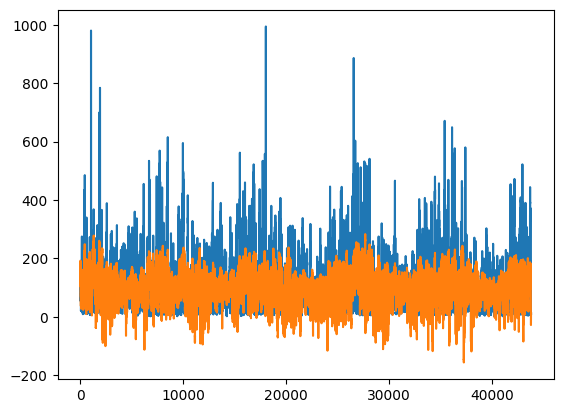

In [18]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(lr.predict(X))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
preds_train = lr.predict(X_train).round(1)

In [22]:
preds_test = lr.predict(X_test).round(1)

In [23]:
lr.score(X_train, y_train)

0.39261657696535934

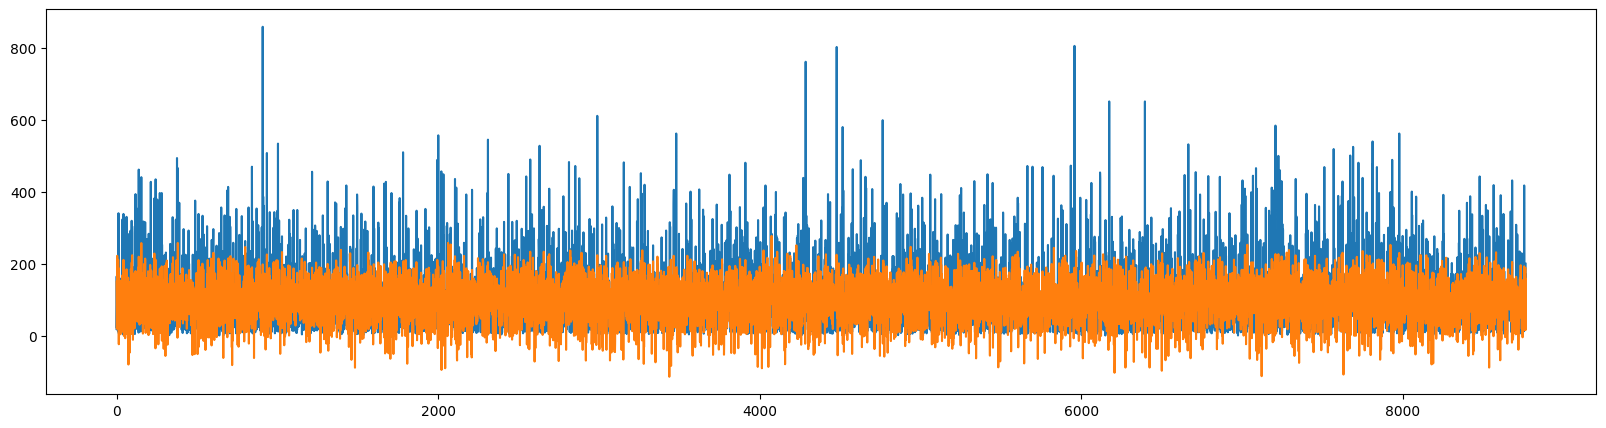

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.plot(y_test.values)          # como plt.plot(bike["cnt"])
plt.plot(lr.predict(X_test))

### RandomForest

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

R2 train: 0.9756637067760194
R2 test : 0.818889353832589


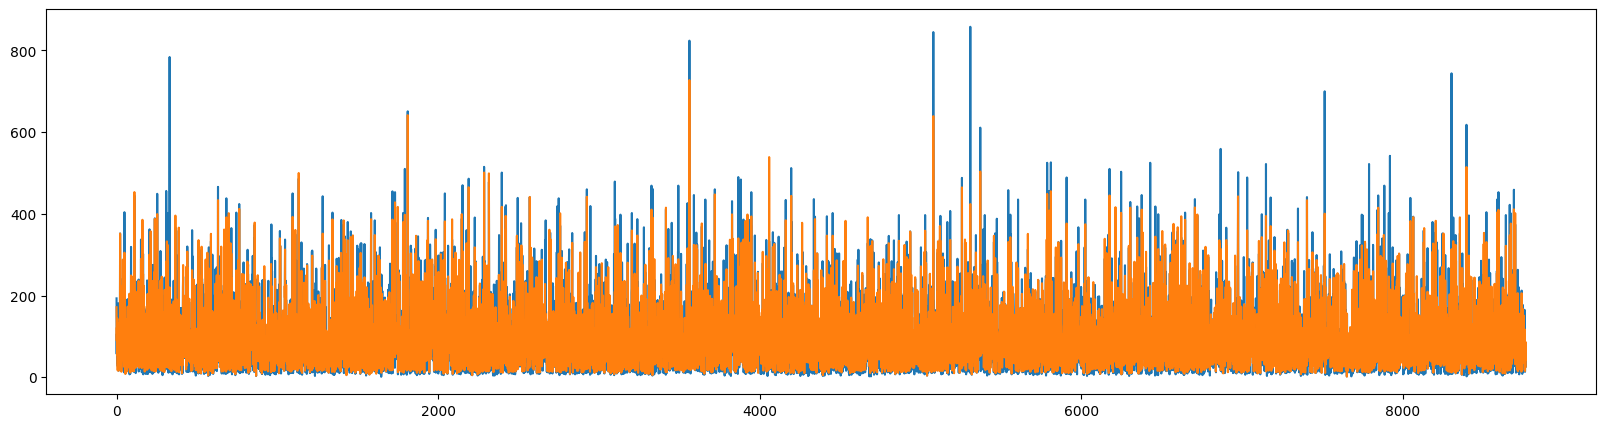

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df2 = df.copy()
df2 = df2.fillna(df2.mean(numeric_only=True))

X = df2.drop(columns=["pm2.5"])
y = df2["pm2.5"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=200,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

print("R2 train:", rf.score(X_train, y_train))
print("R2 test :", rf.score(X_test, y_test))

preds = rf.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(y_test.values)
plt.plot(preds)
plt.show()

### red neuronal

In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# 0) COPIA para no “romper” tu df por ejecuciones repetidas
df2 = df.copy()

# 1) DUMMIES (solo si existe cbwd)
if "cbwd" in df2.columns:
    df2 = pd.get_dummies(df2, columns=["cbwd"])

# 2) ORDEN TEMPORAL + imputación mejor de pm2.5 (si tienes columnas de fecha)
#    En Beijing PM2.5 suele haber: year, month, day, hour
time_cols = ["year", "month", "day", "hour"]
if all(c in df2.columns for c in time_cols):
    dt = pd.to_datetime(df2[time_cols])
    df2 = df2.assign(datetime=dt).sort_values("datetime").drop(columns=["datetime"])

# Imputación: interpolación + forward/back fill (mejor que media para series)
df2["pm2.5"] = df2["pm2.5"].interpolate(method="linear", limit_direction="both")
df2["pm2.5"] = df2["pm2.5"].fillna(df2["pm2.5"].median())  # por si quedara algo raro

# 3) Separar X e y
X = df2.drop(columns=["pm2.5"])
y = df2["pm2.5"].values.reshape(-1, 1)

In [28]:
 #4) Train/Test (si es serie temporal, mejor NO mezclar)
#    Si tienes datetime (porque estaban year/month/day/hour), hacemos split “por orden”
if all(c in df.columns for c in time_cols):
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

In [29]:
# 5) Escalado MinMax en X
scaler_X = MinMaxScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s  = scaler_X.transform(X_test)

# 6) Escalado MinMax en y (MUY importante para redes)
scaler_y = MinMaxScaler()
y_train_s = scaler_y.fit_transform(y_train)
y_test_s  = scaler_y.transform(y_test)


In [30]:
# 7) Modelo (más estable)
n_features = X_train_s.shape[1]

model = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.1),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.1),

    layers.Dense(1)  # salida escalada (0-1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=["mae"]
)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)
]

In [31]:
# 8) Entrenamiento
history = model.fit(
    X_train_s, y_train_s,
    validation_data=(X_test_s, y_test_s),
    epochs=50,
    batch_size=128,
    verbose=2,
    callbacks=callbacks
)

Epoch 1/50
274/274 - 21s - 78ms/step - loss: 0.1286 - mae: 0.2675 - val_loss: 0.0118 - val_mae: 0.0844 - learning_rate: 1.0000e-03
Epoch 2/50
274/274 - 1s - 3ms/step - loss: 0.0248 - mae: 0.1205 - val_loss: 0.0080 - val_mae: 0.0652 - learning_rate: 1.0000e-03
Epoch 3/50
274/274 - 1s - 3ms/step - loss: 0.0107 - mae: 0.0780 - val_loss: 0.0066 - val_mae: 0.0595 - learning_rate: 1.0000e-03
Epoch 4/50
274/274 - 1s - 4ms/step - loss: 0.0076 - mae: 0.0644 - val_loss: 0.0063 - val_mae: 0.0580 - learning_rate: 1.0000e-03
Epoch 5/50
274/274 - 1s - 3ms/step - loss: 0.0068 - mae: 0.0601 - val_loss: 0.0059 - val_mae: 0.0558 - learning_rate: 1.0000e-03
Epoch 6/50
274/274 - 1s - 3ms/step - loss: 0.0064 - mae: 0.0581 - val_loss: 0.0056 - val_mae: 0.0559 - learning_rate: 1.0000e-03
Epoch 7/50
274/274 - 1s - 3ms/step - loss: 0.0059 - mae: 0.0559 - val_loss: 0.0052 - val_mae: 0.0512 - learning_rate: 1.0000e-03
Epoch 8/50
274/274 - 1s - 3ms/step - loss: 0.0056 - mae: 0.0540 - val_loss: 0.0048 - val_mae: 0

In [32]:
# 9) Predicción y métricas EN UNIDADES REALES
y_pred_s = model.predict(X_test_s, verbose=0)
y_pred = scaler_y.inverse_transform(y_pred_s).ravel()
y_true = y_test.ravel()

r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2: 0.8079222030772382
MAE: 26.539038686681028
RMSE: 39.04804364585108


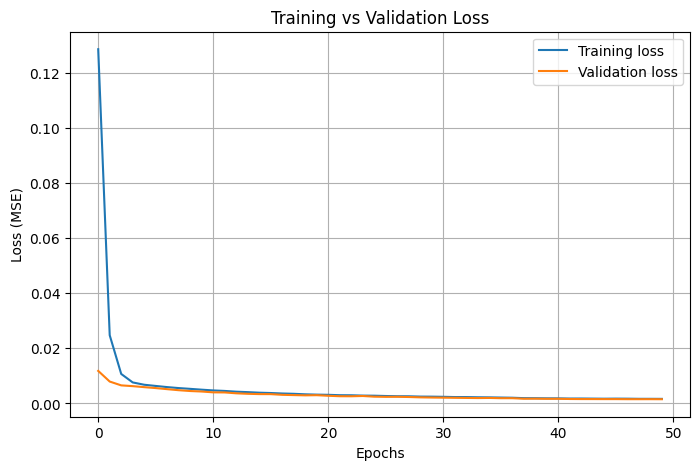

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

### LSMT

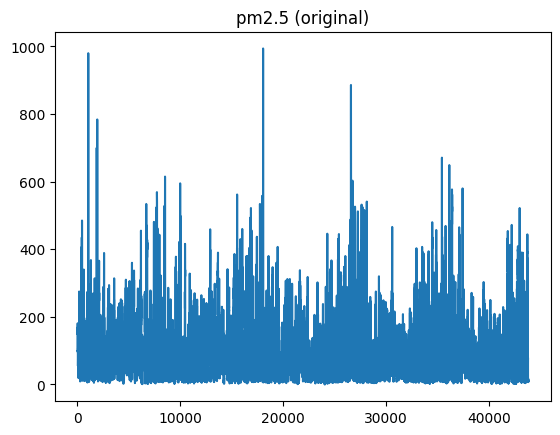

In [34]:
# 1) Mirar la serie
plt.plot(df["pm2.5"])
plt.title("pm2.5 (original)")
plt.show()

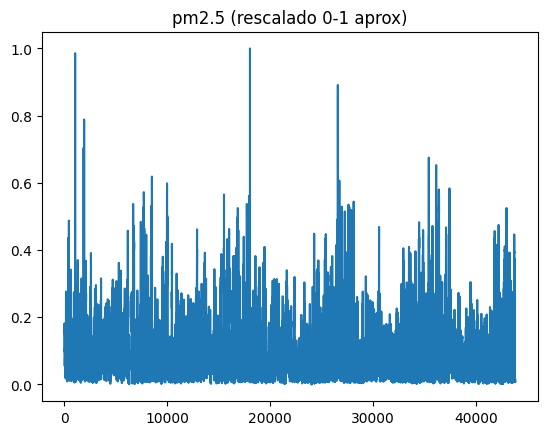

In [35]:
# 2) Rellenar NaN (como serie temporal: interpolación)
serie = df["pm2.5"].copy()
serie = serie.interpolate(method="linear", limit_direction="both")
serie = serie.fillna(serie.median())

# 3) Reescalar (como en tu ejemplo)
rescalado = (serie / serie.max()).values

plt.plot(rescalado)
plt.title("pm2.5 (rescalado 0-1 aprox)")
plt.show()

In [36]:
# 4) Función de bloques
def devuelve_bloques(data, tam_bloque):
    bloques = []
    for i in range(len(data) - tam_bloque):
        bloques.append(data[i:i+tam_bloque])
    return np.array(bloques)

tam_bloque = 10
bloques = devuelve_bloques(rescalado, tam_bloque)

In [37]:
# 5) Construir y (el último valor del siguiente bloque) y x (bloques menos el último)
y = []
for i in range(len(bloques) - 1):
    y.append(bloques[i + 1][-1])

x = bloques[:-1]
y = np.array(y)

print("x shape:", x.shape)   # (n_muestras, 10)
print("y shape:", y.shape)   # (n_muestras,)

x shape: (43813, 10)
y shape: (43813,)


In [40]:
# CASO 1: input_shape = (1, 10)
from keras.models import Sequential
from keras.layers import LSTM, Dense

x1 = x.reshape(x.shape[0], 1, x.shape[1])  # (n, 1, 10)

model1 = Sequential()
model1.add(LSTM(4, input_shape=(1, tam_bloque)))
model1.add(Dense(1))
model1.compile(loss="mse", metrics=["mae"])
model1.summary()

history1 = model1.fit(x1, y, epochs=10, validation_split=0.2, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4)              │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (980.00 B)

 Trainable params: 245 (980.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
pred1 = model1.predict(x1, verbose=0).ravel()
print("pred1[:10]:", pred1[:10])

pred1[:10]: [0.09279445 0.09279445 0.09279445 0.09279445 0.09279445 0.09279445
 0.09279445 0.09279445 0.09279445 0.09279445]


In [42]:
# CASO 2: input_shape = (10, 1)

x2 = x.reshape(x.shape[0], x.shape[1], 1)  # (n, 10, 1)

model2 = Sequential()
model2.add(LSTM(4, input_shape=(tam_bloque, 1)))
model2.add(Dense(1))
model2.compile(loss="mse", metrics=["mae"])
model2.summary()

history2 = model2.fit(x2, y, epochs=10, validation_split=0.2, verbose=0)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
pred2 = model2.predict(x2, verbose=0).ravel()
print("pred2[:10]:", pred2[:10])

pred2[:10]: [0.10064281 0.10064281 0.10064281 0.10064281 0.10064281 0.10064281
 0.10064281 0.10064281 0.10064281 0.10064281]


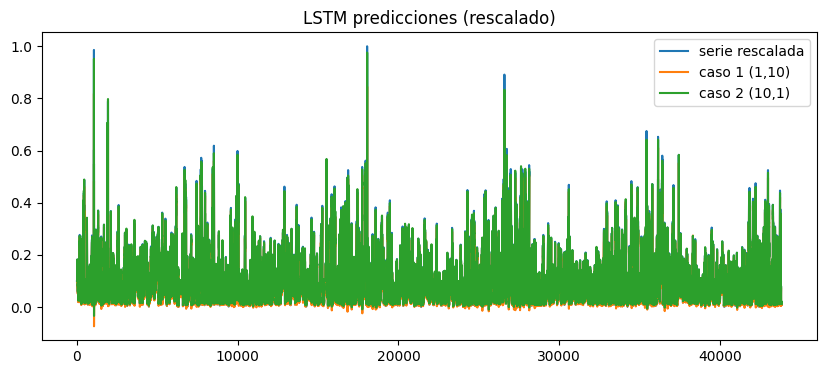

In [44]:
# PLOT comparando

plt.figure(figsize=(10, 4))
plt.plot(rescalado, label="serie rescalada")

# Ponemos las predicciones alineadas al final del tramo donde empiezan a existir ventanas
start = tam_bloque  # primera predicción corresponde aprox a este punto
idx = list(range(start, start + len(pred1)))

plt.plot(idx, pred1, label="caso 1 (1,10)")
plt.plot(idx, pred2, label="caso 2 (10,1)")
plt.legend()
plt.title("LSTM predicciones (rescalado)")
plt.show()


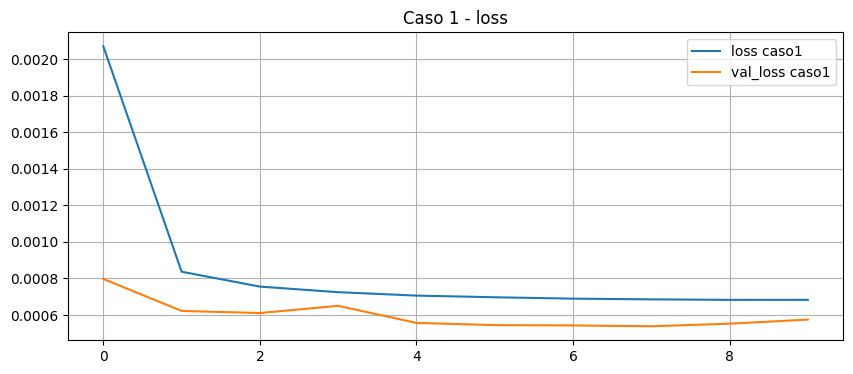

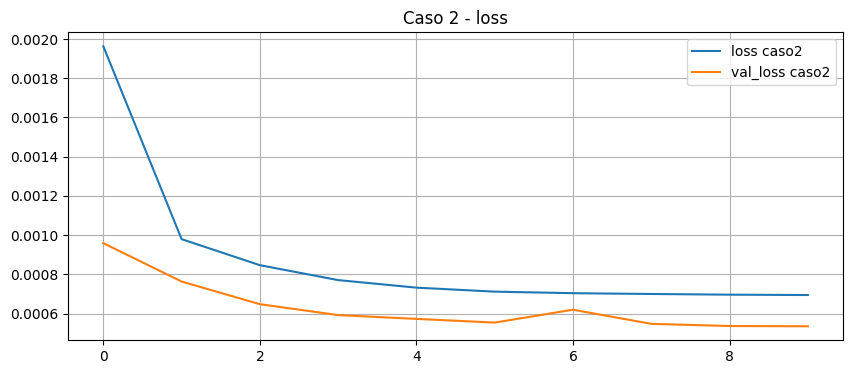

In [45]:
# EXTRA: plot loss/val_loss de ambos (como te pedían antes)

plt.figure(figsize=(10,4))
plt.plot(history1.history["loss"], label="loss caso1")
plt.plot(history1.history["val_loss"], label="val_loss caso1")
plt.legend(); plt.title("Caso 1 - loss"); plt.grid(True); plt.show()

plt.figure(figsize=(10,4))
plt.plot(history2.history["loss"], label="loss caso2")
plt.plot(history2.history["val_loss"], label="val_loss caso2")
plt.legend(); plt.title("Caso 2 - loss"); plt.grid(True); plt.show()